In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [4]:
allFiles = glob.glob("*.csv")
flight_data = pd.DataFrame()
list_ = []
for file_ in allFiles:
    flight_data = pd.read_csv(file_,index_col=None, header=0)
    list_.append(flight_data)
flight_data = pd.concat(list_)

In [292]:
flight_data.shape

(6369482, 25)

In [272]:
flight_data.describe()

,YEAR,MONTH,DAY_OF_MONTH,AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CANCELLED,FLIGHTS,DISTANCE
count,6369482.0,6.369482e+06,6.369482e+06,6.369482e+06,6.369482e+06,6.369482e+06,6.369482e+06,6369482.0,6.369482e+06
mean,2013.0,6.515463e+00,1.571532e+01,2.003565e+04,1.264669e+04,1.264677e+04,1.507375e-02,1.0,7.620779e+02
std,0.0,3.394603e+00,8.768073e+00,3.913778e+02,1.518559e+03,1.518551e+03,1.218464e-01,0.0,5.848169e+02
min,2013.0,1.000000e+00,1.000000e+00,1.939300e+04,1.013500e+04,1.013500e+04,0.000000e+00,1.0,1.700000e+01
25%,2013.0,4.000000e+00,8.000000e+00,1.979000e+04,1.129200e+04,1.129200e+04,0.000000e+00,1.0,3.380000e+02
50%,2013.0,7.000000e+00,1.600000e+01,2.030400e+04,1.288900e+04,1.288900e+04,0.000000e+00,1.0,5.940000e+02
75%,2013.0,9.000000e+00,2.300000e+01,2.036600e+04,1.393000e+04,1.393000e+04,0.000000e+00,1.0,9.910000e+02
max,2013.0,1.200000e+01,3.100000e+01,2.117100e+04,1.621800e+04,1.621800e+04,1.000000e+00,1.0,4.983000e+03


In [97]:
flight_data = flight_data.fillna('')

In [12]:
flight_data = flight_data.drop(labels='Unnamed: 24', axis=1)

In [20]:
airline_id = pd.read_csv('code/L_AIRLINE_ID.csv',index_col=None, header=0)

In [25]:
carrier_id = pd.read_csv('code/L_UNIQUE_CARRIERS.csv',index_col=None, header=0)

In [27]:
carrier_id.shape

(1619, 2)

## Analysis

In [85]:
# 1. What is the 15th most flown route?  
#-route? airport or City? metropolitan

In [319]:
# route = flight_data[['FL_DATE','ORIGIN', 'DEST']].groupby(['ORIGIN', 'DEST']).agg(['count'])
# route

In [174]:
list(route.columns.values)

[('FL_DATE', 'count')]

In [141]:
index = pd.MultiIndex.from_arrays(route, names=['count'])
# grouped.sort_values(by='FL_DATE', ascending=False,index=index)[:10]

In [163]:
# df.ix[:, ['a', 'b']]

In [218]:
# route['FL_DATE']
# route.plot(kind='bar')
# flight_data[['FL_DATE','ORIGIN', 'DEST']].groupby(['ORIGIN', 'DEST']).get_group('FL_DATE')

In [205]:
# route.sort_values(by='FL_DATE', ascending=False)[:15]
route_sorted = route.sortlevel(["DEST"], sort_remaining=True)

In [207]:
route_sorted.columns

MultiIndex(levels=[[u'FL_DATE'], [u'count']],
           labels=[[0], [0]])

In [227]:
route_sorted = flight_data[['ORIGIN','DEST']].groupby(['ORIGIN'])['DEST'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(15)
route_sorted

In [229]:
flight_data[['ORIGIN','DEST']].groupby(['ORIGIN'])['DEST'].count().nlargest(5)

ORIGIN
ATL    398878
ORD    306439
DFW    286427
DEN    226597
LAX    224821
Name: DEST, dtype: int64

In [ ]:
#by airport

In [234]:
from collections import Counter
flights_airport = list(zip(flight_data.ORIGIN, flight_data.DEST))
flights_airport_count = Counter(flights_airport)

In [250]:
# import operator
# flight_airport_list = sorted(flights_airport_count.items(), key=operator.itemgetter(1),reverse=True)
# flight_airport_list_df = pd.DataFrame.from_records(flight_airport_list, columns=['route','frequency'])
flight_airport_list_df[:15]

,route,frequency
0,"(SFO, LAX)",15833
1,"(LAX, SFO)",15798
2,"(OGG, HNL)",11808
3,"(HNL, OGG)",11747
4,"(LAX, LAS)",11563
5,"(LAS, LAX)",11522
6,"(LAX, JFK)",11263
7,"(JFK, LAX)",11262
8,"(LGA, ATL)",10263
9,"(ATL, LGA)",10259


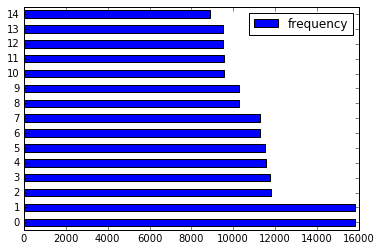

In [259]:
flight_airport_list_df[:15].plot(kind='barh')

In [ ]:
# by city

In [248]:
flights_city = list(zip(flight_data.ORIGIN_CITY_NAME, flight_data.DEST_CITY_NAME))
flights_city_count = Counter(flights_city)

In [249]:
flight_city_list = sorted(flights_city_count.items(), key=operator.itemgetter(1),reverse=True)
flight_city_list_df = pd.DataFrame.from_records(flight_city_list, columns=['route','frequency'])
flight_city_list_df[:15]

,route,frequency
0,"(San Francisco, CA, Los Angeles, CA)",15833
1,"(Los Angeles, CA, San Francisco, CA)",15798
2,"(Chicago, IL, New York, NY)",13304
3,"(New York, NY, Chicago, IL)",13253
4,"(Chicago, IL, Atlanta, GA)",13028
5,"(Atlanta, GA, Chicago, IL)",12998
6,"(New York, NY, Washington, DC)",12450
7,"(Washington, DC, New York, NY)",12413
8,"(New York, NY, Atlanta, GA)",12193
9,"(Atlanta, GA, New York, NY)",12191


In [256]:
list(flight_city_list_df.columns.values)

['route', 'frequency']

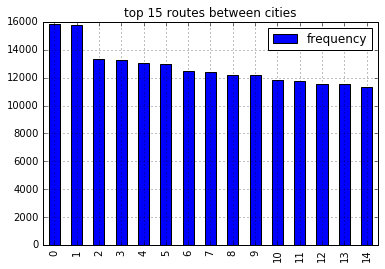

In [271]:
flight_city_list_df[:15].plot(x=None, y=None, kind='bar', ax=None, subplots=False, 
                         sharex=None, sharey=False, layout=None, figsize=None, 
                         use_index=True, title='top 15 routes between cities', grid=True, legend=True, 
                         style=None, logx=False, logy=False, loglog=False, 
                         xticks=None, yticks=None, xlim=None, ylim=None, rot=None, 
                         fontsize=None, colormap=None, table=False, yerr=None, 
                         xerr=None, secondary_y=False, sort_columns=True)

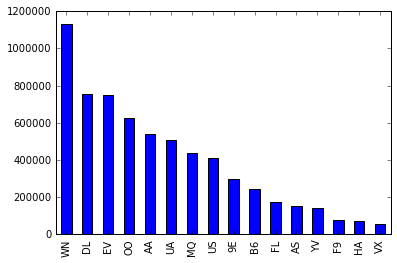

In [265]:
#2. What carrier has flown the 3rd most number of flights? How many? 
#outsourcing carrier

flight_data['CARRIER'].value_counts().plot(kind='bar')

In [70]:
flight_data['CARRIER'].value_counts()[0:3]

WN    1130704
DL     754670
EV     748696
Name: CARRIER, dtype: int64

In [43]:
flight_carrier = pd.DataFrame(flight_data['CARRIER'].value_counts(),columns=['CARRIER','flight_count'])

In [ ]:
flight_carrier_name = pd.merge(flight_carrier, carrier_id, on = '')

In [49]:
flight_data['CARRIER'].value_counts()[0:1]

WN    1130704
Name: CARRIER, dtype: int64

In [33]:
# 3. What airport has the 10th longest delays? -- departure? arrival?

# aviation flying time, reason for delay
# take off late, arrive late,
# delay time period
# what time is the least busy time to fly
# fly directly vs. reroute, which travel time is shorter

In [5]:
#departure
flight_data_dropna=flight_data.copy(deep=True)
flight_data_dropna['DEP_DELAY'].replace('', np.nan, inplace=True)
flight_data_dropna.dropna(subset=['DEP_DELAY'], inplace=True)

In [54]:
delay_origin = pd.DataFrame(flight_data_dropna.sort_values(by='DEP_DELAY', ascending=False)) 

In [62]:
# delay_origin.head

In [61]:
delay_origin_sorted = delay_origin.groupby(['DEST'])['DEP_DELAY'].sum().sort_values(ascending=False)
delay_origin_sorted[:10] # .plot(kind='bar')

DEST
ORD    3972036.0
ATL    3120151.0
SFO    2615929.0
DFW    2513396.0
DEN    2341693.0
EWR    2054701.0
LAX    1990795.0
IAH    1566718.0
LGA    1416640.0
LAS    1342993.0
Name: DEP_DELAY, dtype: float64

In [7]:
#arrival
flight_data_dropna1=flight_data.copy(deep=True)
flight_data_dropna1['ARR_DELAY'].replace('', np.nan, inplace=True)
flight_data_dropna1.dropna(subset=['ARR_DELAY'], inplace=True)

In [38]:
delay_dest = pd.DataFrame(flight_data_dropna1.sort_values(by='ARR_DELAY', ascending=False)) 
delay_dest.columns

Index([u'YEAR', u'MONTH', u'DAY_OF_MONTH', u'FL_DATE', u'AIRLINE_ID',
       u'CARRIER', u'ORIGIN_AIRPORT_ID', u'ORIGIN', u'ORIGIN_CITY_NAME',
       u'ORIGIN_STATE_ABR', u'DEST_AIRPORT_ID', u'DEST', u'DEST_CITY_NAME',
       u'DEST_STATE_ABR', u'DEP_TIME', u'DEP_DELAY', u'DEP_DELAY_NEW',
       u'ARR_TIME', u'ARR_DELAY', u'ARR_DELAY_NEW', u'CANCELLED', u'AIR_TIME',
       u'FLIGHTS', u'DISTANCE', u'Unnamed: 24'],
      dtype='object')

In [59]:
delay_dest_sorted = delay_dest.groupby(['DEST'])['ARR_DELAY'].sum().sort_values(ascending=False)
delay_dest_sorted[:10]
# .plot(kind='bar')

DEST
ORD    2886739.0
ATL    2354624.0
DFW    1725366.0
DEN    1708066.0
SFO    1654428.0
EWR    1299688.0
LAX     956558.0
LGA     924884.0
JFK     873087.0
IAH     787774.0
Name: ARR_DELAY, dtype: float64

In [42]:
# df2 = pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
# df2.groupby(['X']).groups
# delay_dest_df=pd.DataFrame(delay_dest, columns=['DEST','dest_delay'])
# delay_dest_df.dest_delay
# delay_dest_df.groupby(['DEST']).groups
# .sum()

In [ ]:
# 4. What is the second most popular day of the week to travel? Why? 
# by clock hours, departing time

In [81]:
weekdays = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [83]:
import datetime
weekdays.get(datetime.date(flight_data['YEAR'][:1],flight_data['MONTH'][:1],flight_data['DAY_OF_MONTH'][:1]).weekday())

'Thursday'

In [67]:
flight_data_day = flight_data.copy('deep')

In [85]:
def weekday (row):
    return weekdays.get(datetime.date(row['YEAR'],row['MONTH'],row['DAY_OF_MONTH']).weekday())

In [90]:
flight_data_day = flight_data_day.assign(DAY_OF_WEEK=flight_data_day.apply(lambda row: weekday(row),axis=1))

In [89]:
# flight_data_day.drop('Unnamed: 24',1)

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEP_DELAY,DEP_DELAY_NEW,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,DISTANCE,DAY_OF_WEEK
0,2013,1,17,2013-01-17,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-7.0,0.0,1451.0,-14.0,0.0,0.0,175.0,1.0,1391.0,Thursday
1,2013,1,18,2013-01-18,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-8.0,0.0,1459.0,-6.0,0.0,0.0,178.0,1.0,1391.0,Friday
2,2013,1,19,2013-01-19,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-5.0,0.0,1515.0,17.0,17.0,0.0,201.0,1.0,1391.0,Saturday
3,2013,1,20,2013-01-20,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-8.0,0.0,1455.0,-10.0,0.0,0.0,176.0,1.0,1391.0,Sunday
4,2013,1,21,2013-01-21,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-1.0,0.0,1446.0,-19.0,0.0,0.0,162.0,1.0,1391.0,Monday
5,2013,1,22,2013-01-22,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,9.0,9.0,1502.0,-3.0,0.0,0.0,171.0,1.0,1391.0,Tuesday
6,2013,1,23,2013-01-23,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-9.0,0.0,1504.0,-1.0,0.0,0.0,186.0,1.0,1391.0,Wednesday
7,2013,1,24,2013-01-24,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-9.0,0.0,1520.0,15.0,15.0,0.0,204.0,1.0,1391.0,Thursday
8,2013,1,25,2013-01-25,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-3.0,0.0,1525.0,20.0,20.0,0.0,174.0,1.0,1391.0,Friday
9,2013,1,26,2013-01-26,20363,9E,11298,DFW,"Dallas/Fort Worth, TX",TX,...,-6.0,0.0,1509.0,11.0,11.0,0.0,189.0,1.0,1391.0,Saturday


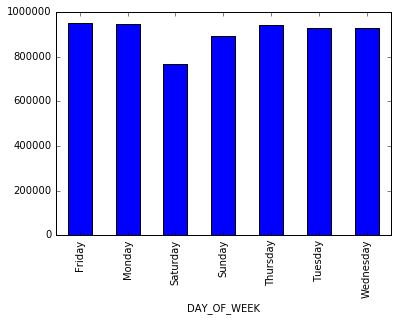

In [100]:
# df_plot=flight_data_day.groupby('DAY_OF_WEEK').count()
df_plot['FL_DATE'].plot(kind='bar')

In [98]:
flight_data_day.groupby('DAY_OF_WEEK').count()

,YEAR,MONTH,DAY_OF_MONTH,FL_DATE,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,...,DEP_DELAY,DEP_DELAY_NEW,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,CANCELLED,AIR_TIME,FLIGHTS,DISTANCE,Unnamed: 24
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
Friday,952033,952033,952033,952033,952033,952033,952033,952033,952033,952033,...,937347,937347,936423,934760,934760,952033,934760,952033,952033,0
Monday,949139,949139,949139,949139,949139,949139,949139,949139,949139,949139,...,936336,936336,935408,933746,933746,949139,933746,949139,949139,0
Saturday,767525,767525,767525,767525,767525,767525,767525,767525,767525,767525,...,758187,758187,757532,755883,755883,767525,755883,767525,767525,0
Sunday,894767,894767,894767,894767,894767,894767,894767,894767,894767,894767,...,882466,882466,881482,879879,879879,894767,879879,894767,894767,0
Thursday,944819,944819,944819,944819,944819,944819,944819,944819,944819,944819,...,930089,930089,928971,927003,927003,944819,927003,944819,944819,0
Tuesday,929959,929959,929959,929959,929959,929959,929959,929959,929959,929959,...,915415,915415,914535,912995,912995,929959,912995,929959,929959,0
Wednesday,931240,931240,931240,931240,931240,931240,931240,931240,931240,931240,...,917961,917961,916856,915044,915044,931240,915044,931240,931240,0


In [ ]:
# 5. What other actionable insights can we gain by leveraging the TranStats dataset?  